In [1]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
import plotly.graph_objs as go

In [3]:
print(__version__)

3.5.0


In [4]:
import pandas as pd

In [6]:
# zetus = pd.read_csv("https://raw.githubusercontent.com/gautsi/gen-purpose-repo/master/zetus.csv")
zetus = pd.read_csv("./../zetus.csv")

In [7]:
zetus_dedup = zetus.drop_duplicates()

In [8]:
len(zetus)

754

In [9]:
len(zetus_dedup.drop_duplicates())

750

In [10]:
zetus_dedup["time_"] = pd.to_datetime(zetus_dedup.time)

/home/gautam_sisodia/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



separate same time feedings

In [11]:
zetus_dedup["prev_dur"] = zetus_dedup.sort_values("time_").groupby(["time_"])["dur"].shift(1)

/home/gautam_sisodia/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [13]:
zetus_dedup["fixed_time_"] = zetus_dedup.apply(
    lambda x: x.time_ + pd.Timedelta(minutes = (x.prev_dur if pd.notna(x.prev_dur) else 0)),
    axis = 1)

/home/gautam_sisodia/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [14]:
init_notebook_mode(connected=True)

In [15]:
zetus_dedup.dtypes

time                   object
dur                     int64
type                   object
time_          datetime64[ns]
prev_dur              float64
fixed_time_    datetime64[ns]
dtype: object

In [16]:
import colorlover as cl

In [17]:
colorscale = cl.scales['5']['qual']['Dark2']
light_colorscale = cl.scales['5']['qual']['Set2']

In [18]:
zetus_dedup["day"] = zetus_dedup.fixed_time_.dt.date

/home/gautam_sisodia/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
zetus_dedup["time_of_day"] = pd.to_datetime(zetus_dedup.fixed_time_.dt.time.astype("str").map(lambda x: "01/01/19 {}".format(x)))

/home/gautam_sisodia/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [20]:
feed_data = [
    go.Bar(
        x = zetus_dedup[zetus_dedup["type"] == side].sort_values("fixed_time_").fixed_time_,
        y = 2 * (i - 0.5) * zetus_dedup[zetus_dedup["type"] == side].sort_values("fixed_time_").dur,
        name = side,
        width = 4 * 1000 * 60,
        marker = {"color": colorscale[i]}) for i, side in enumerate(["L", "R"])
]

output_data = [
    go.Bar(
        x = zetus_dedup[zetus_dedup["type"] == output].sort_values("fixed_time_").fixed_time_,
        y = len(zetus_dedup[zetus_dedup["type"] == output]) * [60],
        name = output,
        base = -30,
        width = 4 * 1000 * 60,
        marker = {"color": colorscale[i + 2]}) for i, output in enumerate(["S", "W"])
]

layout = go.Layout()

fig = go.Figure(data = feed_data + output_data, layout = layout)

iplot(fig)

In [21]:
plot(fig)

'file:///home/gautam_sisodia/gen-purpose-repo/zetus/temp-plot.html'

In [22]:
from plotly import tools

In [23]:
days = zetus_dedup.day.unique()

In [24]:
days

array([datetime.date(2019, 1, 18), datetime.date(2019, 1, 19),
       datetime.date(2019, 1, 20), datetime.date(2019, 1, 21),
       datetime.date(2019, 1, 22), datetime.date(2019, 1, 23),
       datetime.date(2019, 1, 24), datetime.date(2019, 1, 25),
       datetime.date(2019, 1, 26), datetime.date(2019, 1, 27),
       datetime.date(2019, 1, 28), datetime.date(2019, 1, 29),
       datetime.date(2019, 1, 30), datetime.date(2019, 1, 31),
       datetime.date(2019, 2, 1), datetime.date(2019, 2, 2),
       datetime.date(2019, 2, 3), datetime.date(2019, 2, 4),
       datetime.date(2019, 2, 5), datetime.date(2019, 2, 6),
       datetime.date(2019, 2, 7), datetime.date(2019, 2, 8),
       datetime.date(2019, 2, 9), datetime.date(2019, 2, 10),
       datetime.date(2019, 2, 11), datetime.date(2019, 2, 12),
       datetime.date(2019, 2, 13), datetime.date(2019, 2, 14),
       datetime.date(2019, 2, 15), datetime.date(2019, 2, 16),
       datetime.date(2019, 2, 17), datetime.date(2019, 2, 18)], 

In [25]:
feed_data = {
    day: [
        go.Bar(
            x = zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"] == side)].sort_values("fixed_time_").time_of_day,
            y = len(zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"] == side)]) * [1],
            width = 1000 * 60 * zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"] == side)].sort_values("fixed_time_").dur,
            name = side,
            legendgroup = side,
            showlegend = day == days[0],
            hoverinfo = "text",
            text = zetus_dedup[
                (zetus_dedup["day"] == day) & (zetus_dedup["type"] == side)].sort_values("fixed_time_").apply(
                lambda x: "{} for {} min".format(x["type"], x.dur), axis = 1),
            # width = 4 * 1000 * 60,
            offset = 0,
            marker = {"color": colorscale[i]}) for i, side in enumerate(["L", "R"])] + [
        go.Scatter(
            x = zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"] == output)].sort_values("fixed_time_").time_of_day,
            y = len(zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"] == output)]) * [i],
            name = output,
            legendgroup = output,
            showlegend = day == days[0],
            hoverinfo = "text",
            text = zetus_dedup[
                (zetus_dedup["day"] == day) & (zetus_dedup["type"] == output)].sort_values("fixed_time_").apply(
                lambda x: "{} at {}".format(x["type"], x["time_"].strftime("%H:%M")), axis = 1),
            mode = "markers",
            marker = {"color": colorscale[i + 2], "size": 10}) for i, output in enumerate(["S", "W"])] for day in days}

In [26]:
fig = tools.make_subplots(
    rows = len(days),
    cols = 1,
    shared_xaxes = True,
    shared_yaxes = True,
    vertical_spacing = 0.02,
    subplot_titles = ["First Days Input/Output"]
)

for i, day in enumerate(days):
    for bar in feed_data[day]:
        fig.append_trace(bar, i + 1, 1)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  
[ (2,1) x1,y2 ]  
[ (3,1) x1,y3 ]  
[ (4,1) x1,y4 ]  
[ (5,1) x1,y5 ]  
[ (6,1) x1,y6 ]  
[ (7,1) x1,y7 ]  
[ (8,1) x1,y8 ]  
[ (9,1) x1,y9 ]  
[ (10,1) x1,y10 ]
[ (11,1) x1,y11 ]
[ (12,1) x1,y12 ]
[ (13,1) x1,y13 ]
[ (14,1) x1,y14 ]
[ (15,1) x1,y15 ]
[ (16,1) x1,y16 ]
[ (17,1) x1,y17 ]
[ (18,1) x1,y18 ]
[ (19,1) x1,y19 ]
[ (20,1) x1,y20 ]
[ (21,1) x1,y21 ]
[ (22,1) x1,y22 ]
[ (23,1) x1,y23 ]
[ (24,1) x1,y24 ]
[ (25,1) x1,y25 ]
[ (26,1) x1,y26 ]
[ (27,1) x1,y27 ]
[ (28,1) x1,y28 ]
[ (29,1) x1,y29 ]
[ (30,1) x1,y30 ]
[ (31,1) x1,y31 ]
[ (32,1) x1,y32 ]



In [27]:
import datetime as dt

In [28]:
fig["layout"].update(
    # height = 400,
    # width = 1000,
    xaxis = {
        "tickformat": "%H:%M",
        "range": [
            dt.datetime.strptime("01/01/19 00:00", "%m/%d/%y %H:%M"),
            dt.datetime.strptime("01/01/19 23:59", "%m/%d/%y %H:%M")],
        "tick0": dt.datetime.strptime("01/01/19 00:00", "%m/%d/%y %H:%M"),
        "dtick": 1000 * 60 * 60 * 2
    },
    hovermode = "closest",
    plot_bgcolor = "#DCDCDC")

for i in range(len(days)):
    # fig["layout"]["yaxis{}".format(i + 1)]["showgrid"] = False
    fig["layout"]["yaxis{}".format(i + 1)]["tick0"] = 0
    fig["layout"]["yaxis{}".format(i + 1)]["dtick"] = 1
    fig["layout"]["yaxis{}".format(i + 1)]["range"] = [0, 1]    
    fig["layout"]["yaxis{}".format(i + 1)]["showticklabels"] = False
    fig["layout"]["yaxis{}".format(i + 1)]["zeroline"] = False
    fig["layout"]["yaxis{}".format(i + 1)]["title"] = i + 1

In [29]:
iplot(fig)

In [30]:
plot(fig, filename = "input_output.html")

'file:///home/gautam_sisodia/gen-purpose-repo/zetus/input_output.html'

In [70]:
def simp_plot(num_days = 14):
    chosen_days = days[:num_days]
    
    
    in_out_data = {
        day: [
            go.Bar(
                x = zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["L", "R"]))].sort_values("fixed_time_").time_of_day,
                y = len(zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["L", "R"]))]) * [1],
                width = 1000 * 60 * zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["L", "R"]))].sort_values("fixed_time_").dur,
                name = "Feeding",
                legendgroup = "Feeding",
                showlegend = day == days[0],
                hoverinfo = "text",
                text = zetus_dedup[
                    (zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["L", "R"]))].sort_values("fixed_time_").apply(
                    lambda x: "{} min at {}".format(x.dur, x["fixed_time_"].strftime("%H:%M")), axis = 1),
                offset = 0,
                marker = {"color": colorscale[0]})] + [
            go.Scatter(
                x = zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["S", "W"]))].sort_values("fixed_time_").time_of_day,
                y = len(zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["S", "W"]))]) * [0.5],
                name = "Diaper change",
                legendgroup = "Diaper change",
                showlegend = day == days[0],
                hoverinfo = "text",
                text = zetus_dedup[
                    (zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["S", "W"]))].sort_values("fixed_time_").apply(
                    lambda x: "{}".format(x["time_"].strftime("%H:%M")), axis = 1),
                mode = "markers",
                marker = {"color": colorscale[1], "size": 8})] for day in chosen_days}
    
    fig2 = tools.make_subplots(
        rows = len(chosen_days),
        cols = 1,
        shared_xaxes = True,
        shared_yaxes = True,
        vertical_spacing = 0.02,
        subplot_titles = ["First Days Input/Output"])

    for i, day in enumerate(chosen_days):
        for ob in in_out_data[day]:
            fig2.append_trace(ob, i + 1, 1)
            
    fig2["layout"].update(
        height = 30 * len(chosen_days),
        # width = 1000,
        xaxis = {
            "tickformat": "%H:%M",
            "range": [
                dt.datetime.strptime("01/01/19 00:00", "%m/%d/%y %H:%M"),
                dt.datetime.strptime("01/01/19 23:59", "%m/%d/%y %H:%M")],
            "tick0": dt.datetime.strptime("01/01/19 00:00", "%m/%d/%y %H:%M"),
            "dtick": 1000 * 60 * 60 * 2
        },
        hovermode = "closest",
        plot_bgcolor = "#DCDCDC")

    for i in range(len(chosen_days)):
        # fig["layout"]["yaxis{}".format(i + 1)]["showgrid"] = False
        fig2["layout"]["yaxis{}".format(i + 1)]["tick0"] = 0
        fig2["layout"]["yaxis{}".format(i + 1)]["dtick"] = 1
        fig2["layout"]["yaxis{}".format(i + 1)]["range"] = [0, 1]    
        fig2["layout"]["yaxis{}".format(i + 1)]["showticklabels"] = False
        fig2["layout"]["yaxis{}".format(i + 1)]["zeroline"] = False
        fig2["layout"]["yaxis{}".format(i + 1)]["title"] = i + 1
        
    return fig2

In [31]:
first_two_weeks = days[:14]

In [32]:
in_out_data = {
    day: [
        go.Bar(
            x = zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["L", "R"]))].sort_values("fixed_time_").time_of_day,
            y = len(zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["L", "R"]))]) * [1],
            width = 1000 * 60 * zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["L", "R"]))].sort_values("fixed_time_").dur,
            name = "Feeding",
            legendgroup = "Feeding",
            showlegend = day == days[0],
            hoverinfo = "text",
            text = zetus_dedup[
                (zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["L", "R"]))].sort_values("fixed_time_").apply(
                lambda x: "{} min at {}".format(x.dur, x["fixed_time_"].strftime("%H:%M")), axis = 1),
            offset = 0,
            marker = {"color": colorscale[0]})] + [
        go.Scatter(
            x = zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["S", "W"]))].sort_values("fixed_time_").time_of_day,
            y = len(zetus_dedup[(zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["S", "W"]))]) * [0.5],
            name = "Diaper change",
            legendgroup = "Diaper change",
            showlegend = day == days[0],
            hoverinfo = "text",
            text = zetus_dedup[
                (zetus_dedup["day"] == day) & (zetus_dedup["type"].isin(["S", "W"]))].sort_values("fixed_time_").apply(
                lambda x: "{}".format(x["time_"].strftime("%H:%M")), axis = 1),
            mode = "markers",
            marker = {"color": colorscale[1], "size": 8})] for day in first_two_weeks}

In [33]:
fig2 = tools.make_subplots(
    rows = len(first_two_weeks),
    cols = 1,
    shared_xaxes = True,
    shared_yaxes = True,
    vertical_spacing = 0.02,
    subplot_titles = ["First Days Input/Output"]
)

for i, day in enumerate(first_two_weeks):
    for ob in in_out_data[day]:
        fig2.append_trace(ob, i + 1, 1)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  
[ (2,1) x1,y2 ]  
[ (3,1) x1,y3 ]  
[ (4,1) x1,y4 ]  
[ (5,1) x1,y5 ]  
[ (6,1) x1,y6 ]  
[ (7,1) x1,y7 ]  
[ (8,1) x1,y8 ]  
[ (9,1) x1,y9 ]  
[ (10,1) x1,y10 ]
[ (11,1) x1,y11 ]
[ (12,1) x1,y12 ]
[ (13,1) x1,y13 ]
[ (14,1) x1,y14 ]



In [34]:
fig2["layout"].update(
    # height = 400,
    # width = 1000,
    xaxis = {
        "tickformat": "%H:%M",
        "range": [
            dt.datetime.strptime("01/01/19 00:00", "%m/%d/%y %H:%M"),
            dt.datetime.strptime("01/01/19 23:59", "%m/%d/%y %H:%M")],
        "tick0": dt.datetime.strptime("01/01/19 00:00", "%m/%d/%y %H:%M"),
        "dtick": 1000 * 60 * 60 * 2
    },
    hovermode = "closest",
    plot_bgcolor = "#DCDCDC")

for i in range(len(first_two_weeks)):
    # fig["layout"]["yaxis{}".format(i + 1)]["showgrid"] = False
    fig2["layout"]["yaxis{}".format(i + 1)]["tick0"] = 0
    fig2["layout"][b
                   "yaxis{}".format(i + 1)]["dtick"] = 1
    fig2["layout"]["yaxis{}".format(i + 1)]["range"] = [0, 1]    
    fig2["layout"]["yaxis{}".format(i + 1)]["showticklabels"] = False
    fig2["layout"]["yaxis{}".format(i + 1)]["zeroline"] = False
    fig2["layout"]["yaxis{}".format(i + 1)]["title"] = i + 1

In [74]:
iplot(simp_plot(14))

This is the format of your plot grid:
[ (1,1) x1,y1 ]  
[ (2,1) x1,y2 ]  
[ (3,1) x1,y3 ]  
[ (4,1) x1,y4 ]  
[ (5,1) x1,y5 ]  
[ (6,1) x1,y6 ]  
[ (7,1) x1,y7 ]  
[ (8,1) x1,y8 ]  
[ (9,1) x1,y9 ]  
[ (10,1) x1,y10 ]
[ (11,1) x1,y11 ]
[ (12,1) x1,y12 ]
[ (13,1) x1,y13 ]
[ (14,1) x1,y14 ]



In [73]:
iplot(simp_plot(28))

This is the format of your plot grid:
[ (1,1) x1,y1 ]  
[ (2,1) x1,y2 ]  
[ (3,1) x1,y3 ]  
[ (4,1) x1,y4 ]  
[ (5,1) x1,y5 ]  
[ (6,1) x1,y6 ]  
[ (7,1) x1,y7 ]  
[ (8,1) x1,y8 ]  
[ (9,1) x1,y9 ]  
[ (10,1) x1,y10 ]
[ (11,1) x1,y11 ]
[ (12,1) x1,y12 ]
[ (13,1) x1,y13 ]
[ (14,1) x1,y14 ]
[ (15,1) x1,y15 ]
[ (16,1) x1,y16 ]
[ (17,1) x1,y17 ]
[ (18,1) x1,y18 ]
[ (19,1) x1,y19 ]
[ (20,1) x1,y20 ]
[ (21,1) x1,y21 ]
[ (22,1) x1,y22 ]
[ (23,1) x1,y23 ]
[ (24,1) x1,y24 ]
[ (25,1) x1,y25 ]
[ (26,1) x1,y26 ]
[ (27,1) x1,y27 ]
[ (28,1) x1,y28 ]



In [65]:
plot(simp_plot(28), filename = "input_output_simple_3.html")

This is the format of your plot grid:
[ (1,1) x1,y1 ]  
[ (2,1) x1,y2 ]  
[ (3,1) x1,y3 ]  
[ (4,1) x1,y4 ]  
[ (5,1) x1,y5 ]  
[ (6,1) x1,y6 ]  
[ (7,1) x1,y7 ]  
[ (8,1) x1,y8 ]  
[ (9,1) x1,y9 ]  
[ (10,1) x1,y10 ]
[ (11,1) x1,y11 ]
[ (12,1) x1,y12 ]
[ (13,1) x1,y13 ]
[ (14,1) x1,y14 ]
[ (15,1) x1,y15 ]
[ (16,1) x1,y16 ]
[ (17,1) x1,y17 ]
[ (18,1) x1,y18 ]
[ (19,1) x1,y19 ]
[ (20,1) x1,y20 ]
[ (21,1) x1,y21 ]
[ (22,1) x1,y22 ]
[ (23,1) x1,y23 ]
[ (24,1) x1,y24 ]
[ (25,1) x1,y25 ]
[ (26,1) x1,y26 ]
[ (27,1) x1,y27 ]
[ (28,1) x1,y28 ]



'file:///home/gautam_sisodia/gen-purpose-repo/zetus/input_output_simple_3.html'

In [37]:
zetus_dedup["mod_dur"] = zetus_dedup.apply(lambda x: x.dur if x["type"] in ["R", "L"] else 1, axis = 1)

/home/gautam_sisodia/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [38]:
zetus_dedup.head()

,time,dur,type,time_,prev_dur,fixed_time_,day,time_of_day,mod_dur
0,01/18/19 10:00,15,R,2019-01-18 10:00:00,NaN,2019-01-18 10:00:00,2019-01-18,2019-01-01 10:00:00,15
1,01/18/19 10:00,10,L,2019-01-18 10:00:00,15.0,2019-01-18 10:15:00,2019-01-18,2019-01-01 10:15:00,10
2,01/18/19 12:15,15,R,2019-01-18 12:15:00,NaN,2019-01-18 12:15:00,2019-01-18,2019-01-01 12:15:00,15
3,01/18/19 13:00,0,S,2019-01-18 13:00:00,NaN,2019-01-18 13:00:00,2019-01-18,2019-01-01 13:00:00,1
4,01/18/19 14:35,10,L,2019-01-18 14:35:00,NaN,2019-01-18 14:35:00,2019-01-18,2019-01-01 14:35:00,10


In [39]:
zetus_stats = zetus_dedup.groupby(["day", "type"], as_index = False)["mod_dur"].sum().sort_values("day").pivot(index = "day", columns = "type", values = "mod_dur")

In [40]:
zetus_num_feeds = zetus_dedup[zetus_dedup["type"].isin(["L", "R"])].groupby(["day", "type"], as_index = False)["mod_dur"].count().sort_values("day").pivot(index = "day", columns = "type", values = "mod_dur")

In [41]:
zetus_num_feeds

type,L,R
day,,
2019-01-18,4,4
2019-01-19,9,11
2019-01-20,8,9
2019-01-21,8,8
2019-01-22,7,6
2019-01-23,7,5
2019-01-24,6,7
2019-01-25,4,6
2019-01-26,8,7


In [42]:
zetus_stats

type,L,R,S,W
day,,,,
2019-01-18,55,75,1,1
2019-01-19,147,160,1,5
2019-01-20,145,120,4,1
2019-01-21,100,120,4,8
2019-01-22,80,135,6,6
2019-01-23,100,90,7,7
2019-01-24,115,100,5,7
2019-01-25,85,125,3,7
2019-01-26,145,110,7,8


In [43]:
zetus_stats.reset_index()

type,day,L,R,S,W
0,2019-01-18,55,75,1,1
1,2019-01-19,147,160,1,5
2,2019-01-20,145,120,4,1
3,2019-01-21,100,120,4,8
4,2019-01-22,80,135,6,6
5,2019-01-23,100,90,7,7
6,2019-01-24,115,100,5,7
7,2019-01-25,85,125,3,7
8,2019-01-26,145,110,7,8
9,2019-01-27,95,120,6,6


In [44]:
zetus_stats_2 = zetus_stats.reset_index().merge(
    right = zetus_num_feeds.rename(columns = {"L": "num_L", "R": "num_R"}).reset_index(),
    on = ["day"],
    how = "left")

In [45]:
zetus_stats_2["avg_L"] = zetus_stats_2.L / zetus_stats_2.num_L
zetus_stats_2["avg_R"] = zetus_stats_2.R / zetus_stats_2.num_R

In [46]:
zetus_stats_2

type,day,L,R,S,W,num_L,num_R,avg_L,avg_R
0,2019-01-18,55,75,1,1,4,4,13.750000,18.750000
1,2019-01-19,147,160,1,5,9,11,16.333333,14.545455
2,2019-01-20,145,120,4,1,8,9,18.125000,13.333333
3,2019-01-21,100,120,4,8,8,8,12.500000,15.000000
4,2019-01-22,80,135,6,6,7,6,11.428571,22.500000
5,2019-01-23,100,90,7,7,7,5,14.285714,18.000000
6,2019-01-24,115,100,5,7,6,7,19.166667,14.285714
7,2019-01-25,85,125,3,7,4,6,21.250000,20.833333
8,2019-01-26,145,110,7,8,8,7,18.125000,15.714286
9,2019-01-27,95,120,6,6,4,6,23.750000,20.000000


#### Stats part 2

In [47]:
zetus_dedup["mod_type"] = zetus_dedup["type"].map(lambda x: "F" if x in ["L", "R"] else x)

/home/gautam_sisodia/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [48]:
zetus_dedup.head()

,time,dur,type,time_,prev_dur,fixed_time_,day,time_of_day,mod_dur,mod_type
0,01/18/19 10:00,15,R,2019-01-18 10:00:00,NaN,2019-01-18 10:00:00,2019-01-18,2019-01-01 10:00:00,15,F
1,01/18/19 10:00,10,L,2019-01-18 10:00:00,15.0,2019-01-18 10:15:00,2019-01-18,2019-01-01 10:15:00,10,F
2,01/18/19 12:15,15,R,2019-01-18 12:15:00,NaN,2019-01-18 12:15:00,2019-01-18,2019-01-01 12:15:00,15,F
3,01/18/19 13:00,0,S,2019-01-18 13:00:00,NaN,2019-01-18 13:00:00,2019-01-18,2019-01-01 13:00:00,1,S
4,01/18/19 14:35,10,L,2019-01-18 14:35:00,NaN,2019-01-18 14:35:00,2019-01-18,2019-01-01 14:35:00,10,F


In [49]:
zetus_daily_stats = zetus_dedup.groupby(
    ["day", "time", "mod_type"], as_index = False)["dur"].sum().groupby(
    ["day", "mod_type"], as_index = False).agg({"time": "count", "dur": "sum"}).rename(
    columns = {"time": "num", "dur": "min"})

In [50]:
zetus_daily_stats.iloc[:10]

,day,mod_type,min,num
0,2019-01-18,F,130,7
1,2019-01-18,S,0,1
2,2019-01-18,W,0,1
3,2019-01-19,F,307,18
4,2019-01-19,S,0,1
5,2019-01-19,W,0,5
6,2019-01-20,F,265,13
7,2019-01-20,S,0,4
8,2019-01-20,W,0,1
9,2019-01-21,F,220,12


In [51]:
zetus_rolling_stats = zetus_daily_stats.sort_values("day").groupby(["mod_type"], as_index = False).rolling(7, min_periods = 1).mean()

In [52]:
zetus_rolling_num_stats = zetus_rolling_stats.pivot(
    index = "day",
    columns = "mod_type",
    values = "num").reset_index().rename(columns = {"F": "avg_num_F", "S": "avg_num_S", "W": "avg_num_W"})

In [53]:
zetus_rolling_min_stats = zetus_rolling_stats[zetus_rolling_stats["mod_type"] == "F"].pivot(
    index = "day",
    columns = "mod_type",
    values = "min").reset_index().rename(columns = {"F": "avg_ttl_min_F"})

In [54]:
zetus_rolling_stats_table = zetus_rolling_num_stats.merge(right = zetus_rolling_min_stats, on = ["day"], how = "left")

zetus_rolling_stats_table["avg_min_F"] = zetus_rolling_stats_table.avg_ttl_min_F / zetus_rolling_stats_table.avg_num_F

In [55]:
zetus_rolling_stats_table_2 = zetus_rolling_stats_table.set_index("day")[["avg_num_F", "avg_min_F", "avg_num_W", "avg_num_S"]]

In [56]:
zetus_rolling_stats_table_2

mod_type,avg_num_F,avg_min_F,avg_num_W,avg_num_S
day,,,,
2019-01-18,7.000000,18.571429,1.000000,1.000000
2019-01-19,12.500000,17.480000,3.000000,1.000000
2019-01-20,12.666667,18.473684,2.333333,2.000000
2019-01-21,12.500000,18.440000,3.750000,2.500000
2019-01-22,11.800000,19.271186,4.200000,3.200000
2019-01-23,11.333333,19.514706,4.666667,3.833333
2019-01-24,11.571429,19.037037,5.000000,4.000000
2019-01-25,12.000000,19.309524,5.857143,4.285714
2019-01-26,11.285714,19.873418,6.285714,5.142857


In [77]:
zetus_rolling_stats_table_2.to_csv("zetus_stats_021819.csv")

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
sns.set_style("darkgrid")

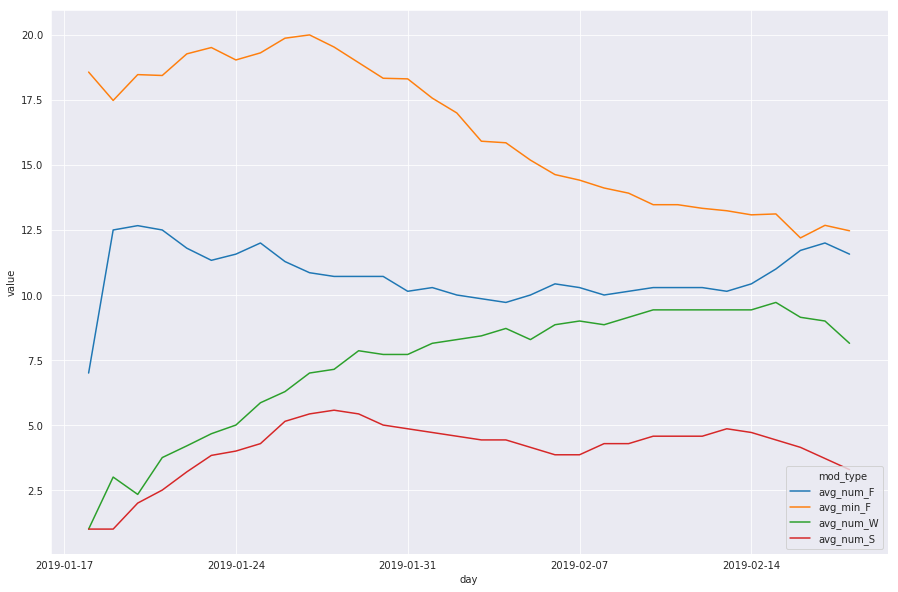

In [59]:
fig, ax = plt.subplots(figsize = (15, 10))



sns.lineplot(
    data = pd.melt(
        zetus_rolling_stats_table_2.reset_index(),
        id_vars = ["day"],
        value_vars = ["avg_num_F", "avg_min_F", "avg_num_W", "avg_num_S"]),
    x = "day",
    y = "value",
    hue = "mod_type",
    ax = ax)

ax.legend(loc = 4)